## Skoltech
## Intro to data science, fall 2022
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://forms.gle/4q7o3aBVduyPgWzv9

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza: https://piazza.com/class/l8q9rqodz872zj

## Dataset

This dataset concerns credit card applications. It has a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. General goal is to predict which people in the dataset are successful in applying for a credit card.

#### Attributes

-   Gender: 0=Female, 1=Male
-   Age: Age in years
-   Debt: Outstanding debt
-   Married: 0=Single/Divorced/etc, 1=Married
-   BankCustomer: 0=does not have a bank account, 1=has a bank account
-   Investment score: a number from 0 to 10
-   BankRecord
-   Industry: job sector of current or most recent job
-   Ethnicity
-   YearsEmployed
-   PriorDefault: 0=no prior defaults, 1=prior default
-   Employed: 0=not employed, 1=employed
-   CreditScore
-   DriversLicense: 0=no license, 1=has license
-   Citizenship: either ByBirth, ByOtherMeans or Temporary
-   ZipCode: 5 digit number
-   Income
-   Approved: 0=not approved, 1=approved

#### Import basic libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [49]:
df = pd.read_csv('credit_score_dataset.csv')

## 1. Data exploration

Let's take a closer look at the data.

In [50]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q1.1

#### How many columns in the dataset?

In [51]:
df.columns.shape[0]

18

### Q1.2

#### How many unique ethnicities are there?

In [52]:
df.Ethnicity.nunique()

5

### Q1.3
#### What is the average age? Please answer with an integer. Please, use int().

In [53]:
int(df.Age.mean())

31

### Q1.4
#### People working in which industry are getting the most income on average?

In [54]:
maxAverageValue = max(df.groupby('Industry')['Income'].mean())
for i in df['Industry'].unique():
    if df[df['Industry'] == str(i)]['Income'].mean() == maxAverageValue:
        print(i)
        break


Transport


### Q1.5

#### Assuming that column 'YearsEmployed' counts years from the first employment until the current moment, in what age people start working? Build a histogram for the age of the first employment. What is the average age to start working at? Please, answer with a float.

29.291


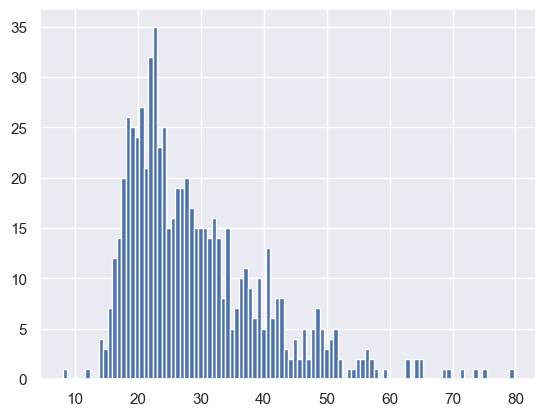

In [55]:
print(round((df['Age'] - df['YearsEmployed']).mean(), 3))
plt.hist((df['Age'] - df['YearsEmployed']), bins = 100)
plt.show()

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for columns from ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'] with 'Approved' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how loan application approval relates to other features. Note, you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) People over 40 years old have less debt than people under 40 years old
- (b) A credit application with low credit score is approved almost always
- (c) There is no clear dependence between debt and years employed
- (d) High income means high credit score

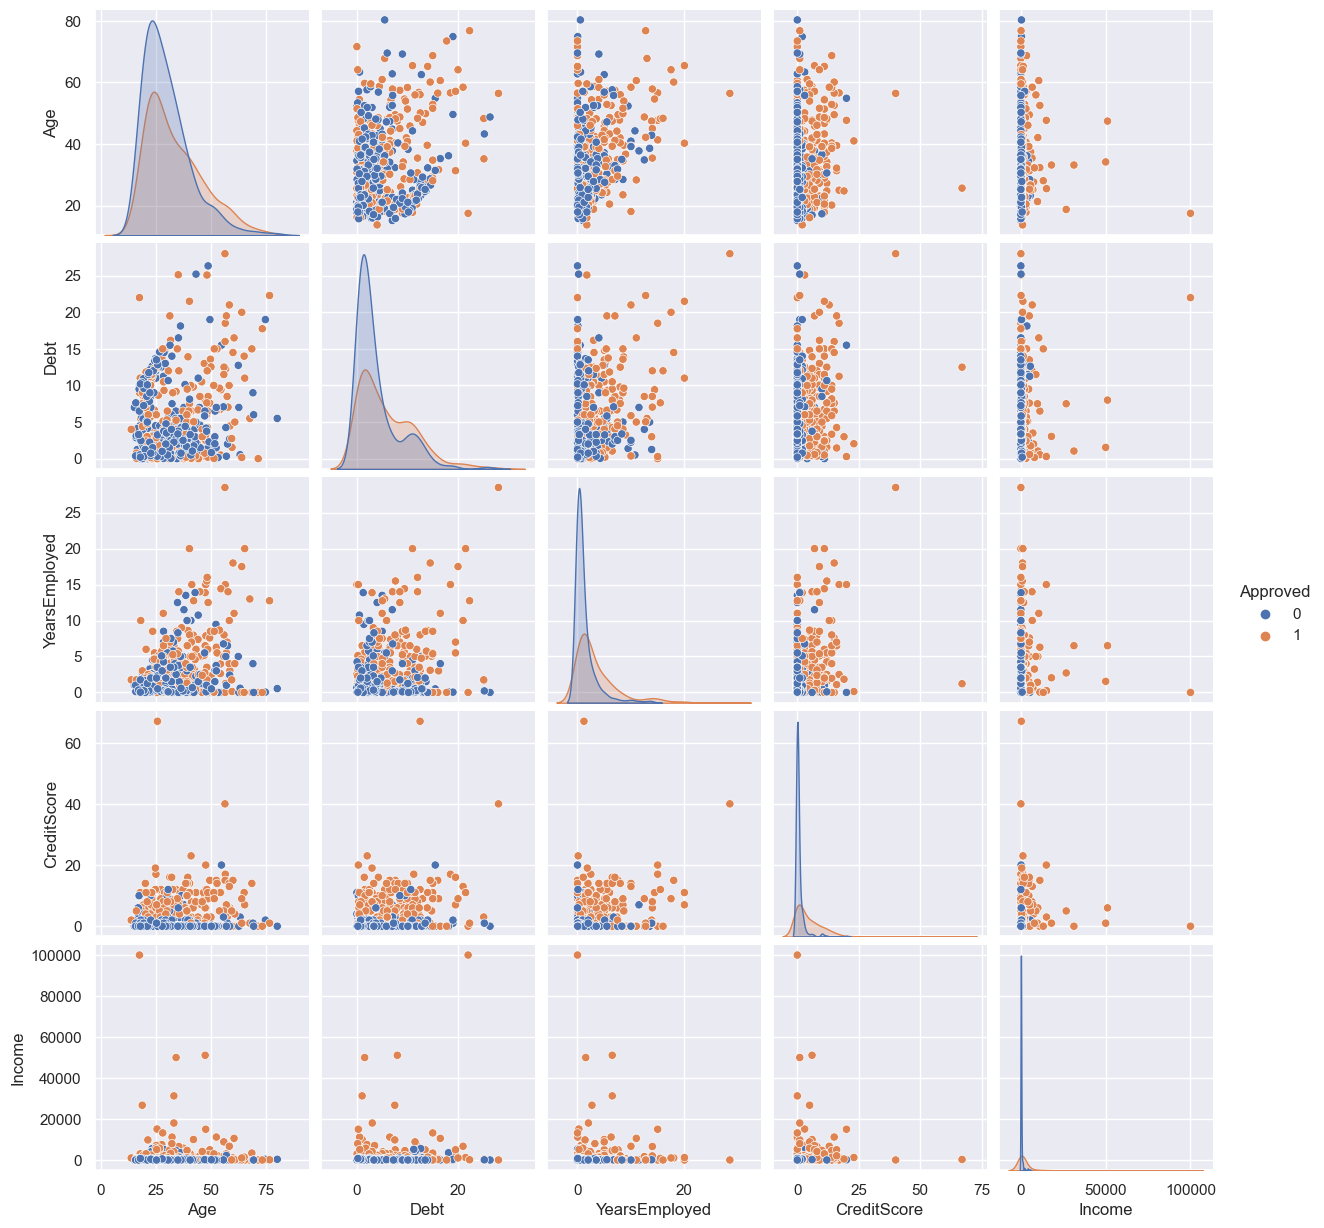

In [56]:
sns.pairplot(vars=['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income'],data=df, hue='Approved', kind='scatter', plot_kws=dict(alpha=1))

__(a)__
False, because there are people who are over 40 who have more debt than younger

__(b)__
False, because there are a lot of people who are not approved with low credid score

__(c)__
True

__(d)__
False

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for ethnicity and industry. How many Latino people are working in healthcare?

In [57]:
pd.crosstab(df['Ethnicity'], df['Industry'], colnames=['Industry'], rownames=['Ethnicity']).loc['Latino', 'Healthcare']

52

## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that are exactly the same for all of the people. Let's drop one of them. As an answer, write the names of these columns divided by a comma.

In [58]:
df


,Gender,Age,Debt,Married,BankCustomer,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,7.30,0,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,1.79,1,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,7.64,0,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,4.92,1,White,0.04,0,0,0,0,ByBirth,280,750,0


In [59]:
flag = True
for i in df.columns:
    for j in df.columns:
        if (i != j) and ((df[str(i)] != df[str(j)]).sum() == 0) and flag:
            print(i, ',', j)
            columnToDrop = str(i)
            flag = False

df.drop(columnToDrop,axis=1, inplace=True)
df.head()

BankCustomer , BankRecord


,Gender,Age,Debt,Married,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


### Q2.2

Now it's time to talk about the task for today. Our bank wants to predict whether the application for a loan is worthy or not. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'Approved' column) and data (the rest of the columns). How many positive labels are there in target?


In [60]:
y = df['Approved']
X = df.iloc[:,:-1]
print(X)
print(y.sum())


     Gender    Age    Debt  Married         Industry  InvestmentScore  \
0         1  30.83   0.000        1      Industrials             3.65   
1         0  58.67   4.460        1        Materials             1.94   
2         0  24.50   0.500        1        Materials             8.15   
3         1  27.83   1.540        1      Industrials             7.99   
4         1  20.17   5.625        1      Industrials             2.37   
..      ...    ...     ...      ...              ...              ...   
685       1  21.08  10.085        0        Education             7.30   
686       0  22.67   0.750        1           Energy             1.79   
687       0  25.25  13.500        0       Healthcare             7.64   
688       1  17.92   0.205        1  ConsumerStaples             4.92   
689       1  35.00   3.375        1           Energy             4.13   

     BankRecord Ethnicity  YearsEmployed  PriorDefault  Employed  CreditScore  \
0             1     White           1.25  

### Q2.3

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 314 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314, stratify=y)
print(y_test.sum())

92


## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, k neighbors classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form as categorical, so let's make a copy of x with the following columns for the section:

'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income'

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [63]:
X_train_copy = X_train[['Gender', 'Age', 'Debt', 'Married', 'BankRecord', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']]
X_test_copy = X_test[['Gender', 'Age', 'Debt', 'Married', 'BankRecord', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']]


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
log_reg = LogisticRegression(max_iter=5000)

log_reg.fit(X_train_copy, y_train)
y_log_ref_pred = log_reg.predict(X_test_copy)
print(round(f1_score(y_test, y_log_ref_pred), 3))



0.862


### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [64]:
from sklearn.neighbors import KNeighborsClassifier

kns = KNeighborsClassifier(n_neighbors=5)

kns.fit(X_train_copy, y_train)
y_pred_kns = kns.predict(X_test_copy)
print(round(f1_score(y_test, y_pred_kns), 3))

0.613


### Q3.3

Build a random forest classifier with n_estimators = 5. What is the f1_score for the model?

In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 5, random_state=314)
rfc.fit(X_train_copy, y_train)
y_pred_rfc = rfc.predict(X_test_copy)
print(round(f1_score(y_test, y_pred_rfc), 3))

0.833


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. You can use verbose argument of GridSearchCV in order to watch the progress of cross-validation. What is the f1 score for the model trained on the full train dataset with this regularization?

In [66]:
from sklearn.model_selection import GridSearchCV

search_space = {
    "C": np.logspace(-6, 1, 40)
}

GS = GridSearchCV(estimator=log_reg,
                 param_grid=search_space,
                 scoring='f1',
                 refit="f1",
                 cv=5,
                 verbose=4)
GS.fit(X_train_copy, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ...........................C=1e-06;, score=0.286 total time=   0.0s
[CV 2/5] END ...........................C=1e-06;, score=0.421 total time=   0.0s
[CV 3/5] END ...........................C=1e-06;, score=0.492 total time=   0.0s
[CV 4/5] END ...........................C=1e-06;, score=0.469 total time=   0.0s
[CV 5/5] END ...........................C=1e-06;, score=0.357 total time=   0.0s
[CV 1/5] END ...........C=1.511775070615663e-06;, score=0.286 total time=   0.0s
[CV 2/5] END ...........C=1.511775070615663e-06;, score=0.448 total time=   0.0s
[CV 3/5] END ...........C=1.511775070615663e-06;, score=0.500 total time=   0.0s
[CV 4/5] END ...........C=1.511775070615663e-06;, score=0.469 total time=   0.0s
[CV 5/5] END ...........C=1.511775070615663e-06;, score=0.357 total time=   0.0s
[CV 1/5] END ..........C=2.2854638641349884e-06;, score=0.286 total time=   0.0s
[CV 2/5] END ..........C=2.2854638641349884e-06

[CV 3/5] END ...........C=0.0038881551803080895;, score=0.657 total time=   0.0s
[CV 4/5] END ...........C=0.0038881551803080895;, score=0.740 total time=   0.0s
[CV 5/5] END ...........C=0.0038881551803080895;, score=0.657 total time=   0.0s
[CV 1/5] END ...........C=0.0058780160722749115;, score=0.730 total time=   0.0s
[CV 2/5] END ...........C=0.0058780160722749115;, score=0.620 total time=   0.0s
[CV 3/5] END ...........C=0.0058780160722749115;, score=0.667 total time=   0.0s
[CV 4/5] END ...........C=0.0058780160722749115;, score=0.740 total time=   0.0s
[CV 5/5] END ...........C=0.0058780160722749115;, score=0.676 total time=   0.0s
[CV 1/5] END ............C=0.008886238162743407;, score=0.730 total time=   0.0s
[CV 2/5] END ............C=0.008886238162743407;, score=0.649 total time=   0.0s
[CV 3/5] END ............C=0.008886238162743407;, score=0.667 total time=   0.0s
[CV 4/5] END ............C=0.008886238162743407;, score=0.789 total time=   0.0s
[CV 5/5] END ............C=0

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-06, 1.51177507e-06, 2.28546386e-06, 3.45510729e-06,
       5.22334507e-06, 7.89652287e-06, 1.19377664e-05, 1.80472177e-05,
       2.72833338e-05, 4.12462638e-05, 6.23550734e-05, 9.42668455e-05,
       1.42510267e-04, 2.15443469e-04, 3.25702066e-04, 4.92388263e-04,
       7.44380301e-04, 1.12533558...57191381e-03,
       3.88815518e-03, 5.87801607e-03, 8.88623816e-03, 1.34339933e-02,
       2.03091762e-02, 3.07029063e-02, 4.64158883e-02, 7.01703829e-02,
       1.06081836e-01, 1.60371874e-01, 2.42446202e-01, 3.66524124e-01,
       5.54102033e-01, 8.37677640e-01, 1.26638017e+00, 1.91448198e+00,
       2.89426612e+00, 4.37547938e+00, 6.61474064e+00, 1.00000000e+01])},
             refit='f1', scoring='f1', verbose=4)

In [67]:
print(GS.best_estimator_)
print(GS.best_params_)
print(round(GS.best_score_, 3))

LogisticRegression(C=1.9144819761699576, max_iter=5000)
{'C': 1.9144819761699576}
0.828


### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [68]:
search_space = {
    "n_neighbors": np.linspace(1,100, 100, dtype=int),
    "weights": ['uniform', 'distance'],
    "p":[1,2]
}

GS_kn = GridSearchCV(estimator=kns,
                 param_grid=search_space,
                 scoring='f1',
                 refit="f1",
                 cv=5,
                 verbose=4)
GS_kn.fit(X_train_copy, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=0.525 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=0.683 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=0.557 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=0.659 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=0.525 total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=0.683 total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=0.557 total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=0.659 total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=distance;, score=0.643 total time=   0.0s
[CV 1/5] END n_neighbors=1, p=2, weights=uniform;, score=0.500 total time=   0.0s
[CV 2/5] END n_neighbors=1, p

[CV 1/5] END n_neighbors=6, p=1, weights=distance;, score=0.519 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=1, weights=distance;, score=0.625 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=1, weights=distance;, score=0.642 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=1, weights=distance;, score=0.582 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=1, weights=distance;, score=0.658 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=2, weights=uniform;, score=0.485 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=2, weights=uniform;, score=0.597 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=2, weights=uniform;, score=0.609 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=2, weights=uniform;, score=0.563 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=2, weights=uniform;, score=0.548 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=2, weights=distance;, score=0.545 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=2, weights=distance;, score=0.615 total time=   0.0s
[CV 3/5] 

[CV 5/5] END n_neighbors=12, p=2, weights=uniform;, score=0.595 total time=   0.0s
[CV 1/5] END n_neighbors=12, p=2, weights=distance;, score=0.526 total time=   0.0s
[CV 2/5] END n_neighbors=12, p=2, weights=distance;, score=0.615 total time=   0.0s
[CV 3/5] END n_neighbors=12, p=2, weights=distance;, score=0.615 total time=   0.0s
[CV 4/5] END n_neighbors=12, p=2, weights=distance;, score=0.590 total time=   0.0s
[CV 5/5] END n_neighbors=12, p=2, weights=distance;, score=0.619 total time=   0.0s
[CV 1/5] END n_neighbors=13, p=1, weights=uniform;, score=0.538 total time=   0.0s
[CV 2/5] END n_neighbors=13, p=1, weights=uniform;, score=0.587 total time=   0.0s
[CV 3/5] END n_neighbors=13, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=13, p=1, weights=uniform;, score=0.649 total time=   0.0s
[CV 5/5] END n_neighbors=13, p=1, weights=uniform;, score=0.651 total time=   0.0s
[CV 1/5] END n_neighbors=13, p=1, weights=distance;, score=0.571 total time=   0.0

[CV 5/5] END n_neighbors=17, p=2, weights=distance;, score=0.698 total time=   0.0s
[CV 1/5] END n_neighbors=18, p=1, weights=uniform;, score=0.514 total time=   0.0s
[CV 2/5] END n_neighbors=18, p=1, weights=uniform;, score=0.556 total time=   0.0s
[CV 3/5] END n_neighbors=18, p=1, weights=uniform;, score=0.676 total time=   0.0s
[CV 4/5] END n_neighbors=18, p=1, weights=uniform;, score=0.640 total time=   0.0s
[CV 5/5] END n_neighbors=18, p=1, weights=uniform;, score=0.650 total time=   0.0s
[CV 1/5] END n_neighbors=18, p=1, weights=distance;, score=0.595 total time=   0.0s
[CV 2/5] END n_neighbors=18, p=1, weights=distance;, score=0.595 total time=   0.0s
[CV 3/5] END n_neighbors=18, p=1, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=18, p=1, weights=distance;, score=0.632 total time=   0.0s
[CV 5/5] END n_neighbors=18, p=1, weights=distance;, score=0.675 total time=   0.0s
[CV 1/5] END n_neighbors=18, p=2, weights=uniform;, score=0.493 total time=   0.0

[CV 4/5] END n_neighbors=24, p=1, weights=uniform;, score=0.642 total time=   0.0s
[CV 5/5] END n_neighbors=24, p=1, weights=uniform;, score=0.659 total time=   0.0s
[CV 1/5] END n_neighbors=24, p=1, weights=distance;, score=0.571 total time=   0.0s
[CV 2/5] END n_neighbors=24, p=1, weights=distance;, score=0.595 total time=   0.0s
[CV 3/5] END n_neighbors=24, p=1, weights=distance;, score=0.701 total time=   0.0s
[CV 4/5] END n_neighbors=24, p=1, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END n_neighbors=24, p=1, weights=distance;, score=0.707 total time=   0.0s
[CV 1/5] END n_neighbors=24, p=2, weights=uniform;, score=0.451 total time=   0.0s
[CV 2/5] END n_neighbors=24, p=2, weights=uniform;, score=0.548 total time=   0.0s
[CV 3/5] END n_neighbors=24, p=2, weights=uniform;, score=0.701 total time=   0.0s
[CV 4/5] END n_neighbors=24, p=2, weights=uniform;, score=0.590 total time=   0.0s
[CV 5/5] END n_neighbors=24, p=2, weights=uniform;, score=0.634 total time=   0.0s

[CV 3/5] END n_neighbors=29, p=1, weights=uniform;, score=0.700 total time=   0.0s
[CV 4/5] END n_neighbors=29, p=1, weights=uniform;, score=0.610 total time=   0.0s
[CV 5/5] END n_neighbors=29, p=1, weights=uniform;, score=0.643 total time=   0.0s
[CV 1/5] END n_neighbors=29, p=1, weights=distance;, score=0.545 total time=   0.0s
[CV 2/5] END n_neighbors=29, p=1, weights=distance;, score=0.587 total time=   0.0s
[CV 3/5] END n_neighbors=29, p=1, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END n_neighbors=29, p=1, weights=distance;, score=0.625 total time=   0.0s
[CV 5/5] END n_neighbors=29, p=1, weights=distance;, score=0.675 total time=   0.0s
[CV 1/5] END n_neighbors=29, p=2, weights=uniform;, score=0.533 total time=   0.0s
[CV 2/5] END n_neighbors=29, p=2, weights=uniform;, score=0.608 total time=   0.0s
[CV 3/5] END n_neighbors=29, p=2, weights=uniform;, score=0.691 total time=   0.0s
[CV 4/5] END n_neighbors=29, p=2, weights=uniform;, score=0.627 total time=   0.0s

[CV 2/5] END n_neighbors=35, p=1, weights=distance;, score=0.579 total time=   0.0s
[CV 3/5] END n_neighbors=35, p=1, weights=distance;, score=0.692 total time=   0.0s
[CV 4/5] END n_neighbors=35, p=1, weights=distance;, score=0.642 total time=   0.0s
[CV 5/5] END n_neighbors=35, p=1, weights=distance;, score=0.667 total time=   0.0s
[CV 1/5] END n_neighbors=35, p=2, weights=uniform;, score=0.545 total time=   0.0s
[CV 2/5] END n_neighbors=35, p=2, weights=uniform;, score=0.582 total time=   0.0s
[CV 3/5] END n_neighbors=35, p=2, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END n_neighbors=35, p=2, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END n_neighbors=35, p=2, weights=uniform;, score=0.651 total time=   0.0s
[CV 1/5] END n_neighbors=35, p=2, weights=distance;, score=0.526 total time=   0.0s
[CV 2/5] END n_neighbors=35, p=2, weights=distance;, score=0.571 total time=   0.0s
[CV 3/5] END n_neighbors=35, p=2, weights=distance;, score=0.658 total time=   0.

[CV 5/5] END n_neighbors=40, p=1, weights=distance;, score=0.675 total time=   0.0s
[CV 1/5] END n_neighbors=40, p=2, weights=uniform;, score=0.472 total time=   0.0s
[CV 2/5] END n_neighbors=40, p=2, weights=uniform;, score=0.582 total time=   0.0s
[CV 3/5] END n_neighbors=40, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=40, p=2, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END n_neighbors=40, p=2, weights=uniform;, score=0.641 total time=   0.0s
[CV 1/5] END n_neighbors=40, p=2, weights=distance;, score=0.514 total time=   0.0s
[CV 2/5] END n_neighbors=40, p=2, weights=distance;, score=0.564 total time=   0.0s
[CV 3/5] END n_neighbors=40, p=2, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=40, p=2, weights=distance;, score=0.617 total time=   0.0s
[CV 5/5] END n_neighbors=40, p=2, weights=distance;, score=0.659 total time=   0.0s
[CV 1/5] END n_neighbors=41, p=1, weights=uniform;, score=0.472 total time=   0.0

[CV 2/5] END n_neighbors=46, p=1, weights=uniform;, score=0.541 total time=   0.0s
[CV 3/5] END n_neighbors=46, p=1, weights=uniform;, score=0.700 total time=   0.0s
[CV 4/5] END n_neighbors=46, p=1, weights=uniform;, score=0.634 total time=   0.0s
[CV 5/5] END n_neighbors=46, p=1, weights=uniform;, score=0.623 total time=   0.0s
[CV 1/5] END n_neighbors=46, p=1, weights=distance;, score=0.553 total time=   0.0s
[CV 2/5] END n_neighbors=46, p=1, weights=distance;, score=0.553 total time=   0.0s
[CV 3/5] END n_neighbors=46, p=1, weights=distance;, score=0.692 total time=   0.0s
[CV 4/5] END n_neighbors=46, p=1, weights=distance;, score=0.642 total time=   0.0s
[CV 5/5] END n_neighbors=46, p=1, weights=distance;, score=0.667 total time=   0.0s
[CV 1/5] END n_neighbors=46, p=2, weights=uniform;, score=0.479 total time=   0.0s
[CV 2/5] END n_neighbors=46, p=2, weights=uniform;, score=0.582 total time=   0.0s
[CV 3/5] END n_neighbors=46, p=2, weights=uniform;, score=0.649 total time=   0.0s

[CV 3/5] END n_neighbors=51, p=2, weights=uniform;, score=0.649 total time=   0.0s
[CV 4/5] END n_neighbors=51, p=2, weights=uniform;, score=0.610 total time=   0.0s
[CV 5/5] END n_neighbors=51, p=2, weights=uniform;, score=0.623 total time=   0.0s
[CV 1/5] END n_neighbors=51, p=2, weights=distance;, score=0.493 total time=   0.0s
[CV 2/5] END n_neighbors=51, p=2, weights=distance;, score=0.545 total time=   0.0s
[CV 3/5] END n_neighbors=51, p=2, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=51, p=2, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END n_neighbors=51, p=2, weights=distance;, score=0.650 total time=   0.0s
[CV 1/5] END n_neighbors=52, p=1, weights=uniform;, score=0.451 total time=   0.0s
[CV 2/5] END n_neighbors=52, p=1, weights=uniform;, score=0.556 total time=   0.0s
[CV 3/5] END n_neighbors=52, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=52, p=1, weights=uniform;, score=0.625 total time=   0.0s

[CV 3/5] END n_neighbors=56, p=2, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END n_neighbors=56, p=2, weights=distance;, score=0.593 total time=   0.0s
[CV 5/5] END n_neighbors=56, p=2, weights=distance;, score=0.667 total time=   0.0s
[CV 1/5] END n_neighbors=57, p=1, weights=uniform;, score=0.429 total time=   0.0s
[CV 2/5] END n_neighbors=57, p=1, weights=uniform;, score=0.551 total time=   0.0s
[CV 3/5] END n_neighbors=57, p=1, weights=uniform;, score=0.701 total time=   0.0s
[CV 4/5] END n_neighbors=57, p=1, weights=uniform;, score=0.642 total time=   0.0s
[CV 5/5] END n_neighbors=57, p=1, weights=uniform;, score=0.603 total time=   0.0s
[CV 1/5] END n_neighbors=57, p=1, weights=distance;, score=0.500 total time=   0.0s
[CV 2/5] END n_neighbors=57, p=1, weights=distance;, score=0.560 total time=   0.0s
[CV 3/5] END n_neighbors=57, p=1, weights=distance;, score=0.692 total time=   0.0s
[CV 4/5] END n_neighbors=57, p=1, weights=distance;, score=0.625 total time=   0.

[CV 1/5] END n_neighbors=62, p=2, weights=uniform;, score=0.424 total time=   0.0s
[CV 2/5] END n_neighbors=62, p=2, weights=uniform;, score=0.583 total time=   0.0s
[CV 3/5] END n_neighbors=62, p=2, weights=uniform;, score=0.609 total time=   0.0s
[CV 4/5] END n_neighbors=62, p=2, weights=uniform;, score=0.593 total time=   0.0s
[CV 5/5] END n_neighbors=62, p=2, weights=uniform;, score=0.620 total time=   0.0s
[CV 1/5] END n_neighbors=62, p=2, weights=distance;, score=0.507 total time=   0.0s
[CV 2/5] END n_neighbors=62, p=2, weights=distance;, score=0.553 total time=   0.0s
[CV 3/5] END n_neighbors=62, p=2, weights=distance;, score=0.641 total time=   0.0s
[CV 4/5] END n_neighbors=62, p=2, weights=distance;, score=0.600 total time=   0.0s
[CV 5/5] END n_neighbors=62, p=2, weights=distance;, score=0.650 total time=   0.0s
[CV 1/5] END n_neighbors=63, p=1, weights=uniform;, score=0.406 total time=   0.0s
[CV 2/5] END n_neighbors=63, p=1, weights=uniform;, score=0.529 total time=   0.0s

[CV 4/5] END n_neighbors=67, p=2, weights=uniform;, score=0.564 total time=   0.0s
[CV 5/5] END n_neighbors=67, p=2, weights=uniform;, score=0.641 total time=   0.0s
[CV 1/5] END n_neighbors=67, p=2, weights=distance;, score=0.441 total time=   0.0s
[CV 2/5] END n_neighbors=67, p=2, weights=distance;, score=0.553 total time=   0.0s
[CV 3/5] END n_neighbors=67, p=2, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=67, p=2, weights=distance;, score=0.608 total time=   0.0s
[CV 5/5] END n_neighbors=67, p=2, weights=distance;, score=0.667 total time=   0.0s
[CV 1/5] END n_neighbors=68, p=1, weights=uniform;, score=0.412 total time=   0.0s
[CV 2/5] END n_neighbors=68, p=1, weights=uniform;, score=0.515 total time=   0.0s
[CV 3/5] END n_neighbors=68, p=1, weights=uniform;, score=0.649 total time=   0.0s
[CV 4/5] END n_neighbors=68, p=1, weights=uniform;, score=0.633 total time=   0.0s
[CV 5/5] END n_neighbors=68, p=1, weights=uniform;, score=0.592 total time=   0.0s

[CV 1/5] END n_neighbors=72, p=2, weights=distance;, score=0.441 total time=   0.0s
[CV 2/5] END n_neighbors=72, p=2, weights=distance;, score=0.553 total time=   0.0s
[CV 3/5] END n_neighbors=72, p=2, weights=distance;, score=0.658 total time=   0.0s
[CV 4/5] END n_neighbors=72, p=2, weights=distance;, score=0.597 total time=   0.0s
[CV 5/5] END n_neighbors=72, p=2, weights=distance;, score=0.650 total time=   0.0s
[CV 1/5] END n_neighbors=73, p=1, weights=uniform;, score=0.435 total time=   0.0s
[CV 2/5] END n_neighbors=73, p=1, weights=uniform;, score=0.537 total time=   0.0s
[CV 3/5] END n_neighbors=73, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=73, p=1, weights=uniform;, score=0.625 total time=   0.0s
[CV 5/5] END n_neighbors=73, p=1, weights=uniform;, score=0.592 total time=   0.0s
[CV 1/5] END n_neighbors=73, p=1, weights=distance;, score=0.457 total time=   0.0s
[CV 2/5] END n_neighbors=73, p=1, weights=distance;, score=0.568 total time=   0.

[CV 5/5] END n_neighbors=77, p=2, weights=distance;, score=0.641 total time=   0.0s
[CV 1/5] END n_neighbors=78, p=1, weights=uniform;, score=0.435 total time=   0.0s
[CV 2/5] END n_neighbors=78, p=1, weights=uniform;, score=0.515 total time=   0.0s
[CV 3/5] END n_neighbors=78, p=1, weights=uniform;, score=0.648 total time=   0.0s
[CV 4/5] END n_neighbors=78, p=1, weights=uniform;, score=0.597 total time=   0.0s
[CV 5/5] END n_neighbors=78, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END n_neighbors=78, p=1, weights=distance;, score=0.457 total time=   0.0s
[CV 2/5] END n_neighbors=78, p=1, weights=distance;, score=0.575 total time=   0.0s
[CV 3/5] END n_neighbors=78, p=1, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END n_neighbors=78, p=1, weights=distance;, score=0.615 total time=   0.0s
[CV 5/5] END n_neighbors=78, p=1, weights=distance;, score=0.623 total time=   0.0s
[CV 1/5] END n_neighbors=78, p=2, weights=uniform;, score=0.381 total time=   0.0

[CV 5/5] END n_neighbors=82, p=2, weights=distance;, score=0.649 total time=   0.0s
[CV 1/5] END n_neighbors=83, p=1, weights=uniform;, score=0.435 total time=   0.0s
[CV 2/5] END n_neighbors=83, p=1, weights=uniform;, score=0.515 total time=   0.0s
[CV 3/5] END n_neighbors=83, p=1, weights=uniform;, score=0.648 total time=   0.0s
[CV 4/5] END n_neighbors=83, p=1, weights=uniform;, score=0.611 total time=   0.0s
[CV 5/5] END n_neighbors=83, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END n_neighbors=83, p=1, weights=distance;, score=0.435 total time=   0.0s
[CV 2/5] END n_neighbors=83, p=1, weights=distance;, score=0.575 total time=   0.0s
[CV 3/5] END n_neighbors=83, p=1, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END n_neighbors=83, p=1, weights=distance;, score=0.597 total time=   0.0s
[CV 5/5] END n_neighbors=83, p=1, weights=distance;, score=0.632 total time=   0.0s
[CV 1/5] END n_neighbors=83, p=2, weights=uniform;, score=0.381 total time=   0.0

[CV 5/5] END n_neighbors=88, p=1, weights=uniform;, score=0.571 total time=   0.0s
[CV 1/5] END n_neighbors=88, p=1, weights=distance;, score=0.435 total time=   0.0s
[CV 2/5] END n_neighbors=88, p=1, weights=distance;, score=0.583 total time=   0.0s
[CV 3/5] END n_neighbors=88, p=1, weights=distance;, score=0.676 total time=   0.0s
[CV 4/5] END n_neighbors=88, p=1, weights=distance;, score=0.605 total time=   0.0s
[CV 5/5] END n_neighbors=88, p=1, weights=distance;, score=0.595 total time=   0.0s
[CV 1/5] END n_neighbors=88, p=2, weights=uniform;, score=0.381 total time=   0.0s
[CV 2/5] END n_neighbors=88, p=2, weights=uniform;, score=0.523 total time=   0.0s
[CV 3/5] END n_neighbors=88, p=2, weights=uniform;, score=0.609 total time=   0.0s
[CV 4/5] END n_neighbors=88, p=2, weights=uniform;, score=0.551 total time=   0.0s
[CV 5/5] END n_neighbors=88, p=2, weights=uniform;, score=0.545 total time=   0.0s
[CV 1/5] END n_neighbors=88, p=2, weights=distance;, score=0.424 total time=   0.0

[CV 1/5] END n_neighbors=94, p=1, weights=distance;, score=0.441 total time=   0.0s
[CV 2/5] END n_neighbors=94, p=1, weights=distance;, score=0.592 total time=   0.0s
[CV 3/5] END n_neighbors=94, p=1, weights=distance;, score=0.693 total time=   0.0s
[CV 4/5] END n_neighbors=94, p=1, weights=distance;, score=0.605 total time=   0.0s
[CV 5/5] END n_neighbors=94, p=1, weights=distance;, score=0.611 total time=   0.0s
[CV 1/5] END n_neighbors=94, p=2, weights=uniform;, score=0.381 total time=   0.0s
[CV 2/5] END n_neighbors=94, p=2, weights=uniform;, score=0.523 total time=   0.0s
[CV 3/5] END n_neighbors=94, p=2, weights=uniform;, score=0.588 total time=   0.0s
[CV 4/5] END n_neighbors=94, p=2, weights=uniform;, score=0.551 total time=   0.0s
[CV 5/5] END n_neighbors=94, p=2, weights=uniform;, score=0.545 total time=   0.0s
[CV 1/5] END n_neighbors=94, p=2, weights=distance;, score=0.400 total time=   0.0s
[CV 2/5] END n_neighbors=94, p=2, weights=distance;, score=0.560 total time=   0.

[CV 3/5] END n_neighbors=100, p=1, weights=uniform;, score=0.585 total time=   0.0s
[CV 4/5] END n_neighbors=100, p=1, weights=uniform;, score=0.551 total time=   0.0s
[CV 5/5] END n_neighbors=100, p=1, weights=uniform;, score=0.559 total time=   0.0s
[CV 1/5] END n_neighbors=100, p=1, weights=distance;, score=0.441 total time=   0.0s
[CV 2/5] END n_neighbors=100, p=1, weights=distance;, score=0.592 total time=   0.0s
[CV 3/5] END n_neighbors=100, p=1, weights=distance;, score=0.667 total time=   0.0s
[CV 4/5] END n_neighbors=100, p=1, weights=distance;, score=0.622 total time=   0.0s
[CV 5/5] END n_neighbors=100, p=1, weights=distance;, score=0.620 total time=   0.0s
[CV 1/5] END n_neighbors=100, p=2, weights=uniform;, score=0.381 total time=   0.0s
[CV 2/5] END n_neighbors=100, p=2, weights=uniform;, score=0.523 total time=   0.0s
[CV 3/5] END n_neighbors=100, p=2, weights=uniform;, score=0.554 total time=   0.0s
[CV 4/5] END n_neighbors=100, p=2, weights=uniform;, score=0.537 total 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             refit='f1', scoring='f1', verbose=4)

In [69]:
print(GS_kn.best_estimator_)
print(GS_kn.best_params_)
print(round(GS_kn.best_score_,3))

KNeighborsClassifier(n_neighbors=25, p=1)
{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}
0.644


### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [70]:
search_space = {
    "n_estimators": np.linspace(1,200, 200, dtype=int),
    "max_features": ["sqrt", "log2", None]
}

GS_rfc = GridSearchCV(estimator=rfc,
                 param_grid=search_space,
                 scoring='f1',
                 refit="f1",
                 cv=5,
                 verbose=4)
GS_rfc.fit(X_train_copy, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END .max_features=sqrt, n_estimators=1;, score=0.744 total time=   0.0s
[CV 2/5] END .max_features=sqrt, n_estimators=1;, score=0.650 total time=   0.0s
[CV 3/5] END .max_features=sqrt, n_estimators=1;, score=0.636 total time=   0.0s
[CV 4/5] END .max_features=sqrt, n_estimators=1;, score=0.809 total time=   0.0s
[CV 5/5] END .max_features=sqrt, n_estimators=1;, score=0.771 total time=   0.0s
[CV 1/5] END .max_features=sqrt, n_estimators=2;, score=0.694 total time=   0.0s
[CV 2/5] END .max_features=sqrt, n_estimators=2;, score=0.571 total time=   0.0s
[CV 3/5] END .max_features=sqrt, n_estimators=2;, score=0.620 total time=   0.0s
[CV 4/5] END .max_features=sqrt, n_estimators=2;, score=0.753 total time=   0.0s
[CV 5/5] END .max_features=sqrt, n_estimators=2;, score=0.594 total time=   0.0s
[CV 1/5] END .max_features=sqrt, n_estimators=3;, score=0.790 total time=   0.0s
[CV 2/5] END .max_features=sqrt, n_estimators

[CV 4/5] END max_features=sqrt, n_estimators=21;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=21;, score=0.875 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=22;, score=0.840 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=22;, score=0.750 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=22;, score=0.762 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=22;, score=0.891 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=22;, score=0.861 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=23;, score=0.857 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=23;, score=0.778 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=23;, score=0.776 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=23;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=23;, score=0.864 total time=   0.0s
[CV 1/5] END max_features=sq

[CV 3/5] END max_features=sqrt, n_estimators=42;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=42;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=42;, score=0.850 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=43;, score=0.847 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=43;, score=0.818 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=43;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=43;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=43;, score=0.840 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=44;, score=0.847 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=44;, score=0.805 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=44;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=44;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=sq

[CV 1/5] END max_features=sqrt, n_estimators=63;, score=0.833 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=63;, score=0.782 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=63;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=63;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=63;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=64;, score=0.843 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=64;, score=0.782 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=64;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=64;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=64;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=65;, score=0.843 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=65;, score=0.782 total time=   0.0s
[CV 3/5] END max_features=sq

[CV 4/5] END max_features=sqrt, n_estimators=83;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=83;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=84;, score=0.790 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=84;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=84;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=84;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=84;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=85;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=85;, score=0.809 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=85;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=85;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=85;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=sq

[CV 2/5] END max_features=sqrt, n_estimators=104;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=104;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=104;, score=0.867 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=104;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=105;, score=0.829 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=105;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=105;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=105;, score=0.867 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=105;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=106;, score=0.829 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=106;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=106;, score=0.809 total time=   0.0s
[CV 4/5] END max

[CV 2/5] END max_features=sqrt, n_estimators=124;, score=0.805 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=124;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=124;, score=0.889 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=124;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=125;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=125;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=125;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=125;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=125;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=126;, score=0.805 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=126;, score=0.805 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=126;, score=0.809 total time=   0.0s
[CV 4/5] END max

[CV 2/5] END max_features=sqrt, n_estimators=144;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=144;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=144;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=144;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=145;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=145;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=145;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=sqrt, n_estimators=145;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=sqrt, n_estimators=145;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=sqrt, n_estimators=146;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=sqrt, n_estimators=146;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=sqrt, n_estimators=146;, score=0.809 total time=   0.0s
[CV 4/5] END max

[CV 2/5] END max_features=sqrt, n_estimators=164;, score=0.782 total time=   0.1s
[CV 3/5] END max_features=sqrt, n_estimators=164;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=sqrt, n_estimators=164;, score=0.879 total time=   0.1s
[CV 5/5] END max_features=sqrt, n_estimators=164;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=sqrt, n_estimators=165;, score=0.810 total time=   0.1s
[CV 2/5] END max_features=sqrt, n_estimators=165;, score=0.782 total time=   0.1s
[CV 3/5] END max_features=sqrt, n_estimators=165;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=sqrt, n_estimators=165;, score=0.879 total time=   0.1s
[CV 5/5] END max_features=sqrt, n_estimators=165;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=sqrt, n_estimators=166;, score=0.819 total time=   0.1s
[CV 2/5] END max_features=sqrt, n_estimators=166;, score=0.782 total time=   0.1s
[CV 3/5] END max_features=sqrt, n_estimators=166;, score=0.809 total time=   0.1s
[CV 4/5] END max

[CV 2/5] END max_features=sqrt, n_estimators=184;, score=0.805 total time=   0.1s
[CV 3/5] END max_features=sqrt, n_estimators=184;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=sqrt, n_estimators=184;, score=0.870 total time=   0.1s
[CV 5/5] END max_features=sqrt, n_estimators=184;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=sqrt, n_estimators=185;, score=0.810 total time=   0.1s
[CV 2/5] END max_features=sqrt, n_estimators=185;, score=0.805 total time=   0.1s
[CV 3/5] END max_features=sqrt, n_estimators=185;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=sqrt, n_estimators=185;, score=0.870 total time=   0.1s
[CV 5/5] END max_features=sqrt, n_estimators=185;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=sqrt, n_estimators=186;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=sqrt, n_estimators=186;, score=0.791 total time=   0.1s
[CV 3/5] END max_features=sqrt, n_estimators=186;, score=0.809 total time=   0.1s
[CV 4/5] END max

[CV 2/5] END .max_features=log2, n_estimators=7;, score=0.764 total time=   0.0s
[CV 3/5] END .max_features=log2, n_estimators=7;, score=0.782 total time=   0.0s
[CV 4/5] END .max_features=log2, n_estimators=7;, score=0.848 total time=   0.0s
[CV 5/5] END .max_features=log2, n_estimators=7;, score=0.821 total time=   0.0s
[CV 1/5] END .max_features=log2, n_estimators=8;, score=0.810 total time=   0.0s
[CV 2/5] END .max_features=log2, n_estimators=8;, score=0.729 total time=   0.0s
[CV 3/5] END .max_features=log2, n_estimators=8;, score=0.753 total time=   0.0s
[CV 4/5] END .max_features=log2, n_estimators=8;, score=0.876 total time=   0.0s
[CV 5/5] END .max_features=log2, n_estimators=8;, score=0.805 total time=   0.0s
[CV 1/5] END .max_features=log2, n_estimators=9;, score=0.829 total time=   0.0s
[CV 2/5] END .max_features=log2, n_estimators=9;, score=0.719 total time=   0.0s
[CV 3/5] END .max_features=log2, n_estimators=9;, score=0.744 total time=   0.0s
[CV 4/5] END .max_features=l

[CV 4/5] END max_features=log2, n_estimators=28;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=28;, score=0.864 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=29;, score=0.843 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=29;, score=0.818 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=29;, score=0.776 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=29;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=29;, score=0.864 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=30;, score=0.843 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=30;, score=0.818 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=30;, score=0.776 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=30;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=30;, score=0.864 total time=   0.0s
[CV 1/5] END max_features=lo

[CV 1/5] END max_features=log2, n_estimators=49;, score=0.833 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=49;, score=0.805 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=49;, score=0.818 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=49;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=49;, score=0.840 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=50;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=50;, score=0.805 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=50;, score=0.828 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=50;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=50;, score=0.840 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=51;, score=0.860 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=51;, score=0.805 total time=   0.0s
[CV 3/5] END max_features=lo

[CV 4/5] END max_features=log2, n_estimators=69;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=69;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=70;, score=0.805 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=70;, score=0.809 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=70;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=70;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=70;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=71;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=71;, score=0.822 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=71;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=71;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=71;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=lo

[CV 3/5] END max_features=log2, n_estimators=90;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=90;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=90;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=91;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=91;, score=0.809 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=91;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=91;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=91;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=92;, score=0.829 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=92;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=92;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=92;, score=0.867 total time=   0.0s
[CV 5/5] END max_features=lo

[CV 4/5] END max_features=log2, n_estimators=110;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=110;, score=0.829 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=111;, score=0.833 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=111;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=111;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=111;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=111;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=112;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=112;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=112;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=112;, score=0.879 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=112;, score=0.843 total time=   0.0s
[CV 1/5] END max

[CV 5/5] END max_features=log2, n_estimators=130;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=131;, score=0.805 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=131;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=131;, score=0.822 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=131;, score=0.889 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=131;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=132;, score=0.805 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=132;, score=0.805 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=132;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=log2, n_estimators=132;, score=0.889 total time=   0.0s
[CV 5/5] END max_features=log2, n_estimators=132;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=log2, n_estimators=133;, score=0.805 total time=   0.0s
[CV 2/5] END max

[CV 5/5] END max_features=log2, n_estimators=150;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=151;, score=0.819 total time=   0.0s
[CV 2/5] END max_features=log2, n_estimators=151;, score=0.795 total time=   0.0s
[CV 3/5] END max_features=log2, n_estimators=151;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=log2, n_estimators=151;, score=0.879 total time=   0.1s
[CV 5/5] END max_features=log2, n_estimators=151;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=152;, score=0.819 total time=   0.1s
[CV 2/5] END max_features=log2, n_estimators=152;, score=0.795 total time=   0.1s
[CV 3/5] END max_features=log2, n_estimators=152;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=log2, n_estimators=152;, score=0.879 total time=   0.1s
[CV 5/5] END max_features=log2, n_estimators=152;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=153;, score=0.833 total time=   0.1s
[CV 2/5] END max

[CV 5/5] END max_features=log2, n_estimators=170;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=171;, score=0.824 total time=   0.1s
[CV 2/5] END max_features=log2, n_estimators=171;, score=0.782 total time=   0.1s
[CV 3/5] END max_features=log2, n_estimators=171;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=log2, n_estimators=171;, score=0.879 total time=   0.1s
[CV 5/5] END max_features=log2, n_estimators=171;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=172;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=log2, n_estimators=172;, score=0.782 total time=   0.1s
[CV 3/5] END max_features=log2, n_estimators=172;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=log2, n_estimators=172;, score=0.879 total time=   0.1s
[CV 5/5] END max_features=log2, n_estimators=172;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=173;, score=0.810 total time=   0.1s
[CV 2/5] END max

[CV 5/5] END max_features=log2, n_estimators=190;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=191;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=log2, n_estimators=191;, score=0.791 total time=   0.1s
[CV 3/5] END max_features=log2, n_estimators=191;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=log2, n_estimators=191;, score=0.870 total time=   0.1s
[CV 5/5] END max_features=log2, n_estimators=191;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=192;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=log2, n_estimators=192;, score=0.791 total time=   0.1s
[CV 3/5] END max_features=log2, n_estimators=192;, score=0.809 total time=   0.1s
[CV 4/5] END max_features=log2, n_estimators=192;, score=0.870 total time=   0.1s
[CV 5/5] END max_features=log2, n_estimators=192;, score=0.843 total time=   0.1s
[CV 1/5] END max_features=log2, n_estimators=193;, score=0.810 total time=   0.1s
[CV 2/5] END max

[CV 2/5] END max_features=None, n_estimators=12;, score=0.782 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=12;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=12;, score=0.831 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=12;, score=0.850 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=13;, score=0.828 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=13;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=13;, score=0.791 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=13;, score=0.860 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=13;, score=0.843 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=14;, score=0.780 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=14;, score=0.771 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=14;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=No

[CV 4/5] END max_features=None, n_estimators=32;, score=0.860 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=32;, score=0.867 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=33;, score=0.828 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=33;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=33;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=33;, score=0.842 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=33;, score=0.871 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=34;, score=0.837 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=34;, score=0.773 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=34;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=34;, score=0.851 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=34;, score=0.881 total time=   0.0s
[CV 1/5] END max_features=No

[CV 1/5] END max_features=None, n_estimators=53;, score=0.805 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=53;, score=0.778 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=53;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=53;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=53;, score=0.871 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=54;, score=0.805 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=54;, score=0.773 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=54;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=54;, score=0.882 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=54;, score=0.871 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=55;, score=0.805 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=55;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=No

[CV 5/5] END max_features=None, n_estimators=73;, score=0.884 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=74;, score=0.790 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=74;, score=0.756 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=74;, score=0.795 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=74;, score=0.860 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=74;, score=0.881 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=75;, score=0.780 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=75;, score=0.756 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=75;, score=0.809 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=75;, score=0.842 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=75;, score=0.881 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=76;, score=0.790 total time=   0.0s
[CV 2/5] END max_features=No

[CV 2/5] END max_features=None, n_estimators=94;, score=0.756 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=94;, score=0.813 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=94;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=94;, score=0.871 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=95;, score=0.780 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=95;, score=0.756 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=95;, score=0.813 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=95;, score=0.870 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=95;, score=0.871 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=96;, score=0.780 total time=   0.0s
[CV 2/5] END max_features=None, n_estimators=96;, score=0.764 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=96;, score=0.813 total time=   0.0s
[CV 4/5] END max_features=No

[CV 4/5] END max_features=None, n_estimators=114;, score=0.851 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=114;, score=0.871 total time=   0.0s
[CV 1/5] END max_features=None, n_estimators=115;, score=0.771 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=115;, score=0.778 total time=   0.0s
[CV 3/5] END max_features=None, n_estimators=115;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=115;, score=0.842 total time=   0.0s
[CV 5/5] END max_features=None, n_estimators=115;, score=0.871 total time=   0.1s
[CV 1/5] END max_features=None, n_estimators=116;, score=0.765 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=116;, score=0.778 total time=   0.1s
[CV 3/5] END max_features=None, n_estimators=116;, score=0.800 total time=   0.0s
[CV 4/5] END max_features=None, n_estimators=116;, score=0.851 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=116;, score=0.857 total time=   0.1s
[CV 1/5] END max

[CV 4/5] END max_features=None, n_estimators=134;, score=0.842 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=134;, score=0.871 total time=   0.1s
[CV 1/5] END max_features=None, n_estimators=135;, score=0.771 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=135;, score=0.778 total time=   0.1s
[CV 3/5] END max_features=None, n_estimators=135;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=None, n_estimators=135;, score=0.842 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=135;, score=0.871 total time=   0.1s
[CV 1/5] END max_features=None, n_estimators=136;, score=0.771 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=136;, score=0.778 total time=   0.1s
[CV 3/5] END max_features=None, n_estimators=136;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=None, n_estimators=136;, score=0.842 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=136;, score=0.871 total time=   0.1s
[CV 1/5] END max

[CV 4/5] END max_features=None, n_estimators=154;, score=0.833 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=154;, score=0.871 total time=   0.1s
[CV 1/5] END max_features=None, n_estimators=155;, score=0.771 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=155;, score=0.778 total time=   0.1s
[CV 3/5] END max_features=None, n_estimators=155;, score=0.813 total time=   0.1s
[CV 4/5] END max_features=None, n_estimators=155;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=155;, score=0.884 total time=   0.1s
[CV 1/5] END max_features=None, n_estimators=156;, score=0.771 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=156;, score=0.778 total time=   0.1s
[CV 3/5] END max_features=None, n_estimators=156;, score=0.813 total time=   0.1s
[CV 4/5] END max_features=None, n_estimators=156;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=156;, score=0.884 total time=   0.1s
[CV 1/5] END max

[CV 4/5] END max_features=None, n_estimators=174;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=174;, score=0.871 total time=   0.1s
[CV 1/5] END max_features=None, n_estimators=175;, score=0.795 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=175;, score=0.787 total time=   0.1s
[CV 3/5] END max_features=None, n_estimators=175;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=None, n_estimators=175;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=175;, score=0.871 total time=   0.1s
[CV 1/5] END max_features=None, n_estimators=176;, score=0.780 total time=   0.1s
[CV 2/5] END max_features=None, n_estimators=176;, score=0.787 total time=   0.1s
[CV 3/5] END max_features=None, n_estimators=176;, score=0.800 total time=   0.1s
[CV 4/5] END max_features=None, n_estimators=176;, score=0.845 total time=   0.1s
[CV 5/5] END max_features=None, n_estimators=176;, score=0.871 total time=   0.1s
[CV 1/5] END max

[CV 4/5] END max_features=None, n_estimators=194;, score=0.845 total time=   0.2s
[CV 5/5] END max_features=None, n_estimators=194;, score=0.871 total time=   0.2s
[CV 1/5] END max_features=None, n_estimators=195;, score=0.795 total time=   0.2s
[CV 2/5] END max_features=None, n_estimators=195;, score=0.787 total time=   0.2s
[CV 3/5] END max_features=None, n_estimators=195;, score=0.813 total time=   0.2s
[CV 4/5] END max_features=None, n_estimators=195;, score=0.845 total time=   0.2s
[CV 5/5] END max_features=None, n_estimators=195;, score=0.871 total time=   0.2s
[CV 1/5] END max_features=None, n_estimators=196;, score=0.795 total time=   0.2s
[CV 2/5] END max_features=None, n_estimators=196;, score=0.773 total time=   0.2s
[CV 3/5] END max_features=None, n_estimators=196;, score=0.813 total time=   0.2s
[CV 4/5] END max_features=None, n_estimators=196;, score=0.845 total time=   0.2s
[CV 5/5] END max_features=None, n_estimators=196;, score=0.871 total time=   0.2s
[CV 1/5] END max

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=314),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  6...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200])},
             refit='f1', scoring='f1', verbose=4)

In [71]:
print(GS_rfc.best_estimator_)
print(GS_rfc.best_params_)
print(round(GS_rfc.best_score_,3))

RandomForestClassifier(n_estimators=31, random_state=314)
{'max_features': 'sqrt', 'n_estimators': 31}
0.842


In [72]:
log_reg = LogisticRegression(max_iter=5000, C=GS.best_params_['C'])

log_reg.fit(X_train_copy, y_train)
y_log_ref_pred = log_reg.predict(X_test_copy)
print(round(f1_score(y_test, y_log_ref_pred), 3))

0.862


In [73]:
kns = KNeighborsClassifier(n_neighbors=GS_kn.best_params_['n_neighbors'], p= GS_kn.best_params_['p'], 
                           weights= GS_kn.best_params_['weights'])

kns.fit(X_train_copy, y_train)
y_pred_kns = kns.predict(X_test_copy)
print(round(f1_score(y_test, y_pred_kns), 3))

0.647


In [74]:
rfc = RandomForestClassifier(max_features= GS_rfc.best_params_['max_features'], n_estimators= GS_rfc.best_params_['n_estimators'], random_state=314)
rfc.fit(X_train_copy, y_train)
y_pred_rfc = rfc.predict(X_test_copy)
print(round(f1_score(y_test, y_pred_rfc), 3))

0.849


## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Age', 'Debt', 'YearsEmployed', 'InvestmentScore', 'CreditScore', 'ZipCode', 'Income'. 

What is the maximum value of Income now in the test set?

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Gender', 'Age', 'Debt', 'Married', 'BankRecord', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']] = scaler.fit_transform(X_train[['Gender', 'Age', 'Debt', 'Married', 'BankRecord', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']])
X_test[['Gender', 'Age', 'Debt', 'Married', 'BankRecord', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']] = scaler.fit_transform(X_test[['Gender', 'Age', 'Debt', 'Married', 'BankRecord', 'InvestmentScore', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income']])

print(round(X_test['Income'].max(), 3))




6.03


### Q4.2
We have three categorical columns - 'Industry', 'Ethnicity' and 'Citizen'. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Industry', 'Ethnicity' and 'Citizen' columns.

How many columns do we have now?

In [76]:

dummy_columns_train = pd.get_dummies(X_train[['Industry', 'Ethnicity', 'Citizen']])
dummy_columns_test = pd.get_dummies(X_test[['Industry', 'Ethnicity', 'Citizen']])

X_train = pd.concat((X_train, dummy_columns_train), axis=1)
X_test = pd.concat((X_test, dummy_columns_test), axis=1)

X_train.drop(['Industry', 'Ethnicity', 'Citizen'], axis=1, inplace=True)
X_test.drop(['Industry', 'Ethnicity', 'Citizen'], axis=1, inplace=True)

print(X_train.shape[1])

35


### Q4.3

To check the effects of the modification, train the logistic regression with **updated** optimal C. What is the f1 score now?

In [77]:
log_reg = LogisticRegression(max_iter=5000, C=GS.best_params_['C'])

log_reg.fit(X_train, y_train)
y_log_ref_pred = log_reg.predict(X_test)
print(round(f1_score(y_test, y_log_ref_pred), 3))

0.88


In [78]:
kns = KNeighborsClassifier(n_neighbors=GS_kn.best_params_['n_neighbors'], p= GS_kn.best_params_['p'], 
                           weights= GS_kn.best_params_['weights'])

kns.fit(X_train, y_train)
y_pred_kns = kns.predict(X_test)
print(round(f1_score(y_test, y_pred_kns), 3))

0.842


In [79]:
rfc = RandomForestClassifier(max_features= GS_rfc.best_params_['max_features'], n_estimators= GS_rfc.best_params_['n_estimators'],
                            random_state=314)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(round(f1_score(y_test, y_pred_rfc), 3))

0.893


### Q4.4

Another popular performance metric is the ROC curve. Train a k-NN and logistic regression with **updated** optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

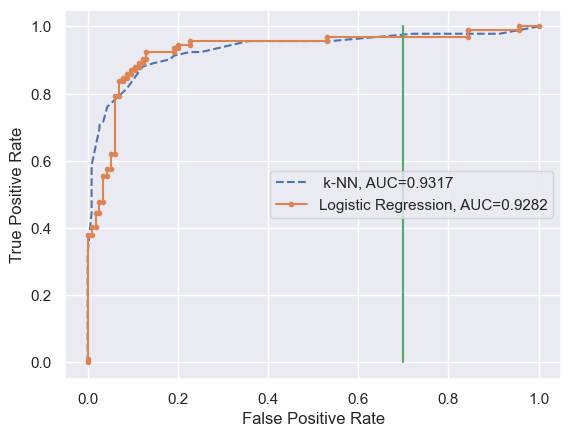

What is the difference between them on FPR 0.7 (approximately) -  0.006


In [86]:
from sklearn.metrics import roc_curve,roc_auc_score 
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_probe_log = log_reg.predict_proba(X_test)[:,1]
y_pred_probe_kns = kns.predict_proba(X_test)[:,1]
kns_fpr, kns_tpr, _ = roc_curve(y_test, y_pred_probe_kns)
auc_kns = round(roc_auc_score(y_test, y_pred_probe_kns), 4)

log_fpr, log_tpr, _ = roc_curve(y_test, y_pred_probe_log)
auc_log = round(roc_auc_score(y_test, y_pred_probe_log), 4)

plt.plot(kns_fpr, kns_tpr, linestyle="--", label=" k-NN, AUC="+str(auc_kns))
plt.plot(log_fpr, log_tpr, marker=".", label="Logistic Regression, AUC="+str(auc_log))
plt.plot([0.7, 0.7], [0,1])
# plt.plot(rfc_fpr, rfc_tpr - kns_tpr, marker=",", label="difference")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
print('What is the difference between them on FPR 0.7 (approximately) - ', 0.006)

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

In [87]:
df.head()

,Gender,Age,Debt,Married,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [88]:
df_copy = df

In [89]:
# df[df['Gender'] == 1 & df['Employed'] == 1]
#   df_copy.query('Gender ==1 and Employed ==1')
df_copy['Male_Employed'] = df_copy[['Gender', 'Employed']].apply(lambda x: 1 if x[0] == 1 and x[1] ==1 else 0, axis=1)
df_copy['Female_Employed'] = df_copy[['Gender', 'Employed']].apply(lambda x: 1 if x[0] == 0 and x[1] ==1 else 0, axis=1)

In [90]:
df_copy.head()

,Gender,Age,Debt,Married,Industry,InvestmentScore,BankRecord,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Male_Employed,Female_Employed
0,1,30.83,0.000,1,Industrials,3.65,1,White,1.25,1,1,1,0,ByBirth,202,0,1,1,0
1,0,58.67,4.460,1,Materials,1.94,1,Black,3.04,1,1,6,0,ByBirth,43,560,1,0,1
2,0,24.50,0.500,1,Materials,8.15,1,Black,1.50,1,0,0,0,ByBirth,280,824,1,0,0
3,1,27.83,1.540,1,Industrials,7.99,1,White,3.75,1,1,5,1,ByBirth,100,3,1,1,0
4,1,20.17,5.625,1,Industrials,2.37,1,White,1.71,1,0,0,0,ByOtherMeans,120,0,1,0,0


In [39]:
df_copy.groupby('Male_Employed')['Approved'].describe()

,count,mean,std,min,25%,50%,75%,max
Male_Employed,,,,,,,,
0,497.0,0.336016,0.472820,0.0,0.0,0.0,1.0,1.0
1,193.0,0.725389,0.447479,0.0,0.0,1.0,1.0,1.0


In [91]:
df_copy.groupby('Female_Employed')['Approved'].describe()

,count,mean,std,min,25%,50%,75%,max
Female_Employed,,,,,,,,
0,588.0,0.404762,0.491264,0.0,0.0,0.0,1.0,1.0
1,102.0,0.676471,0.470133,0.0,0.0,1.0,1.0,1.0


In [92]:
df_copy.groupby('Gender')['Approved'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
0,210.0,0.466667,0.500080,0.0,0.0,0.0,1.0,1.0
1,480.0,0.435417,0.496329,0.0,0.0,0.0,1.0,1.0


In [93]:
df.query('Age >50 and Gender ==1')['Approved'].mean()

0.6388888888888888

In [107]:
X_train_new = X_train
X_test_new = X_test

In [118]:

X_train_new['Male_Employed'] = X_train_new[['Gender', 'Employed']].apply(lambda x: 1 if x[0] == 1 and x[1] ==1 else 0, axis=1)
X_test_new['Male_Employed'] = X_test_new[['Gender', 'Employed']].apply(lambda x: 1 if x[0] == 1 and x[1] ==1 else 0, axis=1)

X_train_new['Male_over50'] = X_train_new[['Age', 'Gender']].apply(lambda x: 1 if x[0] > 50 and x[1] ==1 else 0, axis=1)
X_test_new['Male_over50'] = X_test_new[['Age', 'Gender']].apply(lambda x: 1 if x[0] > 50 and x[1] ==1 else 0, axis=1)


In [119]:
log_reg = LogisticRegression(max_iter=5000, C=GS.best_params_['C'])

log_reg.fit(X_train_new, y_train)
y_log_ref_pred = log_reg.predict(X_test_new)
print(round(f1_score(y_test, y_log_ref_pred), 3))

0.88


### Q5.2

Train an xboost model with f1 score 0.8+

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=314)


gbc.fit(X_train, y_train)
y_pred_gbs = gbc.predict(X_test)
print(round(f1_score(y_test, y_pred_gbs), 3))


0.851
